In [3]:
import pandas as pd
import numpy as np

In [4]:
ds = "large"

In [5]:
ref_df = pd.read_csv(f"1_outputs/{ds}/ref_df.csv", index_col=0)
ref_df.head()

,id,entity,y,train,test,val
69993,69993,NCBIGENE:1,False,True,False,False
69994,69994,NCBIGENE:10,False,False,True,False
69995,69995,NCBIGENE:100,False,False,True,False
69996,69996,NCBIGENE:1000,False,False,True,False
69997,69997,NCBIGENE:10000,True,True,False,False


In [6]:
i = 0
X_all = np.load(f"1_outputs/{ds}/RotatE_X_{i}.npy")

ds_names = ("train", "test", "val")
Xs = {ds: X_all[ref_df.query(ds)["id"]] for ds in ds_names}
ys = {ds: ref_df.query(ds)["y"].values for ds in ds_names}

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_train_tf = tsne.fit_transform(Xs["train"])

<Axes: >

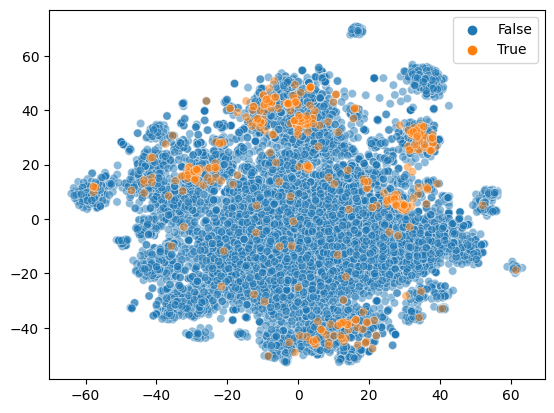

In [8]:
import seaborn as sns

y_train = ys["train"]
order = np.argsort(y_train)

sns.scatterplot(
    x=X_train_tf[order, 0], y=X_train_tf[order, 1], hue=y_train[order], alpha=0.5
)